In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
df= pd.read_excel('Bird Strikes data.xlsx')

In [71]:
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [72]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [74]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [75]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,25429,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,2007-01-22 13:20:40.017303040,5.567354e+03,799.028432,0.001056
min,1195.000000,1.000000,2000-01-02 00:00:00,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,2004-06-17 00:00:00,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,2007-07-29 00:00:00,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,2009-11-01 00:00:00,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,2011-12-31 00:00:00,1.239775e+07,18000.000000,6.000000
std,38510.453382,12.793975,NaN,1.219713e+05,1740.079843,0.050420


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

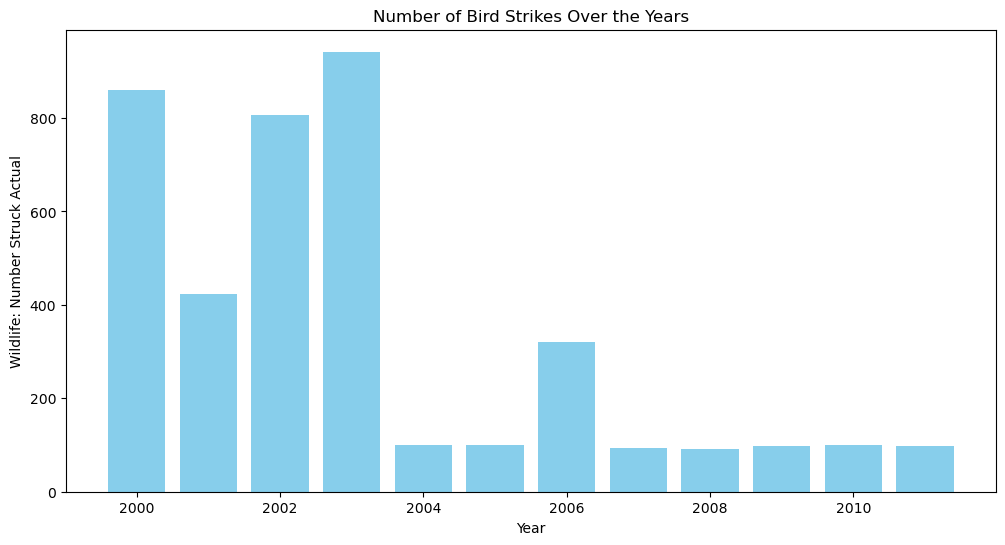

In [84]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Wildlife: Number Struck Actual')
plt.title('Number of Bird Strikes Over the Years')
plt.show()

In [91]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

In [93]:
# Extract year from 'FlightDate'
df['Year'] = df['FlightDate'].dt.year

# List of non-U.S. states and territories to exclude
non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 'Ontario', 
                  'Newfoundland and Labrador', 'Alberta', 'Saskatchewan']

df_us = df[~df['Origin State'].isin(non_us_states)]   # Filter rows where 'Origin State' is not in the non-U.S. states list


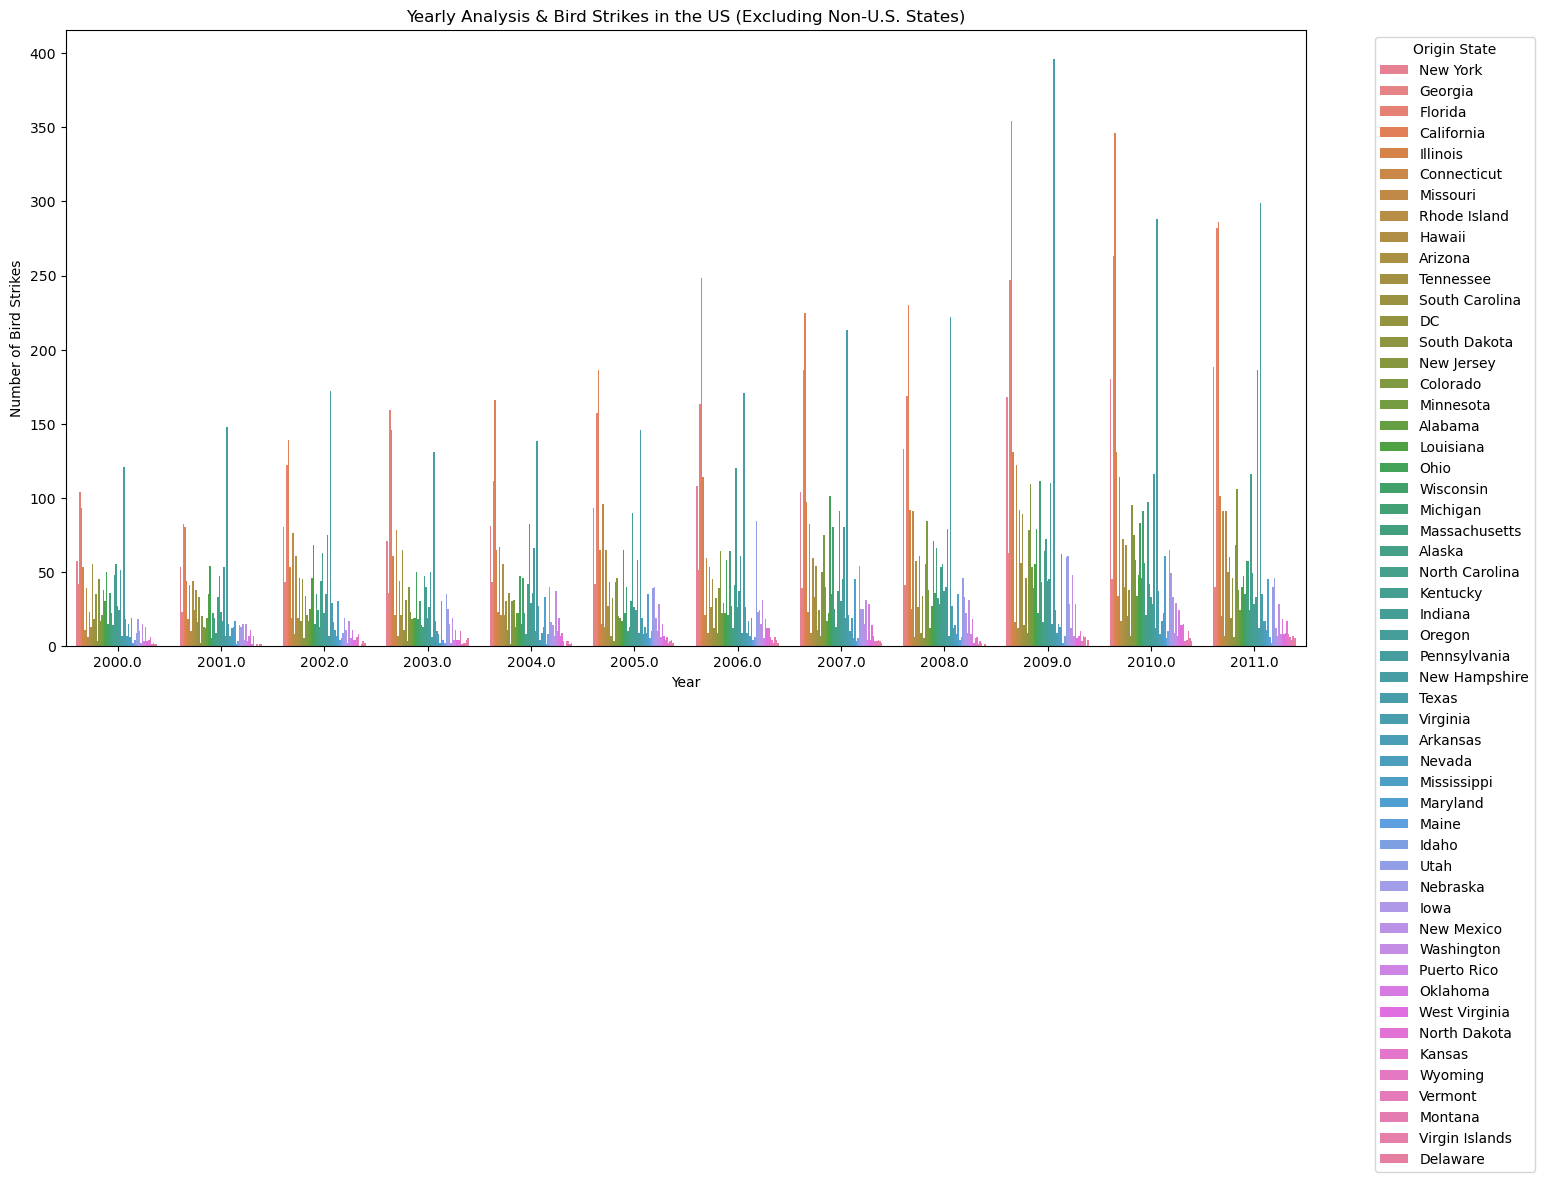

In [95]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Year', hue='Origin State', data=df_us)
plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_12424\975849678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')


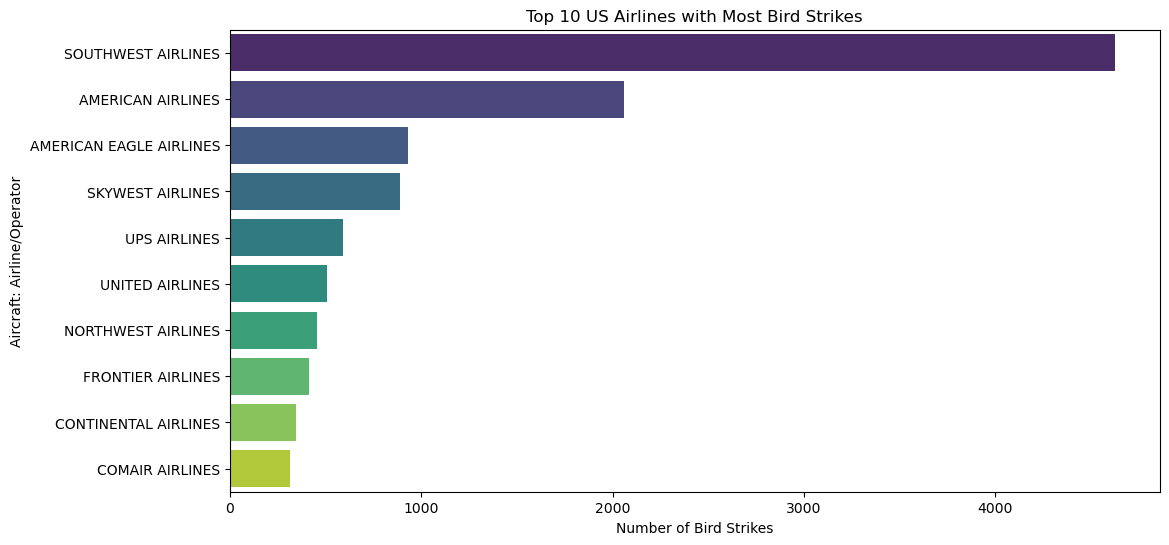

In [97]:
df_us_airlines = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]

# Plot the top 10 U.S. airlines with the most bird strikes
plt.figure(figsize=(12, 6))
top_airlines = df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft: Airline/Operator')
plt.show()

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_12424\1314666583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')


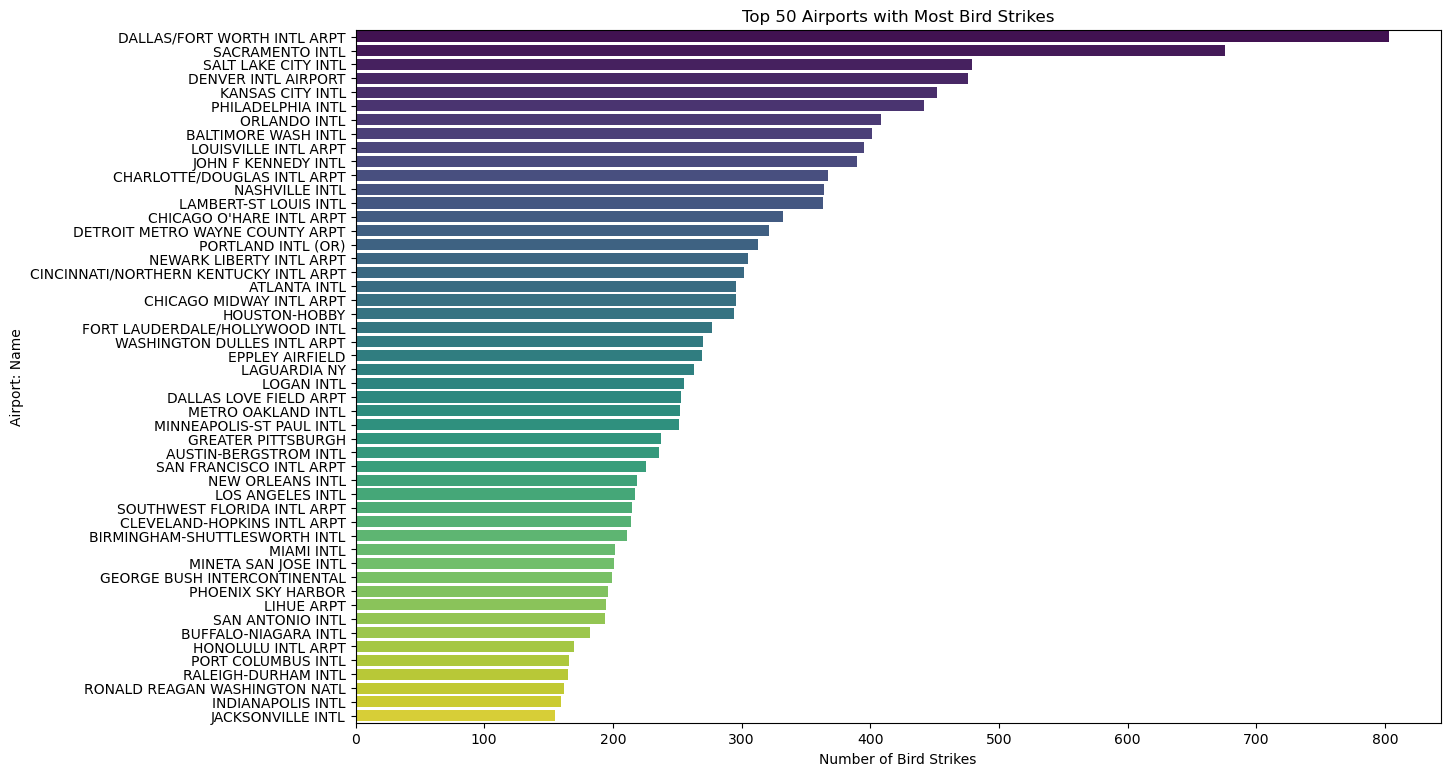

In [99]:
plt.figure(figsize=(14, 9))
top_airports = df['Airport: Name'].value_counts().nlargest(50)
sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport: Name')
plt.show()

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_12424\3821989578.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')


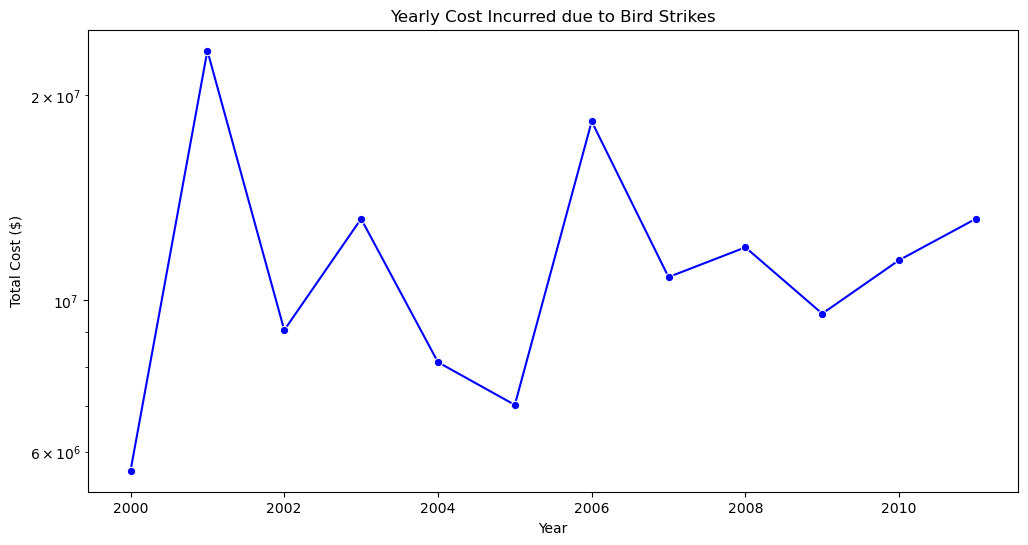

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')
plt.yscale('log')  # Using a logarithmic scale
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_12424\2736792258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')


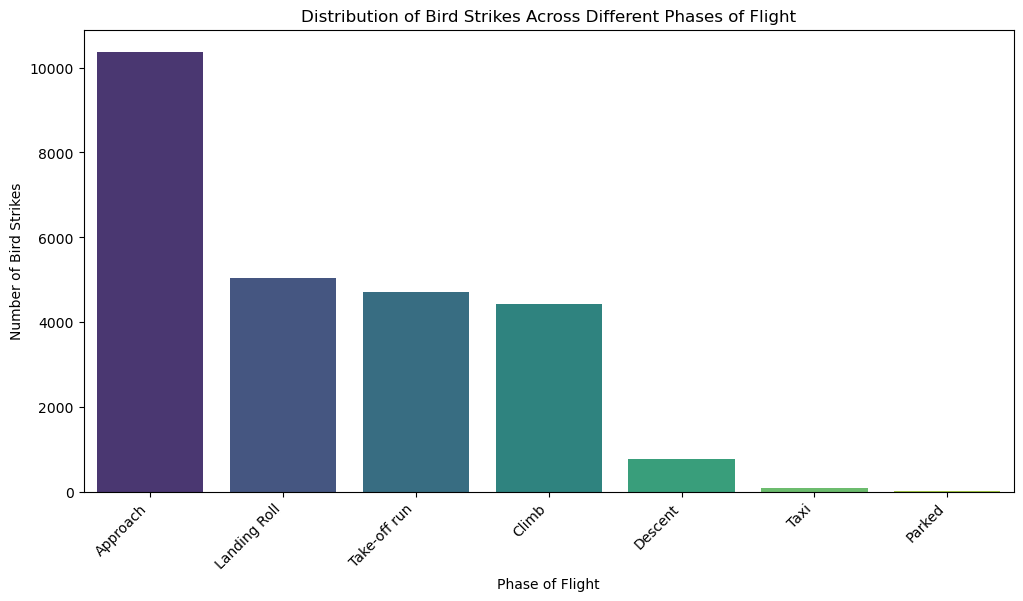

In [103]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

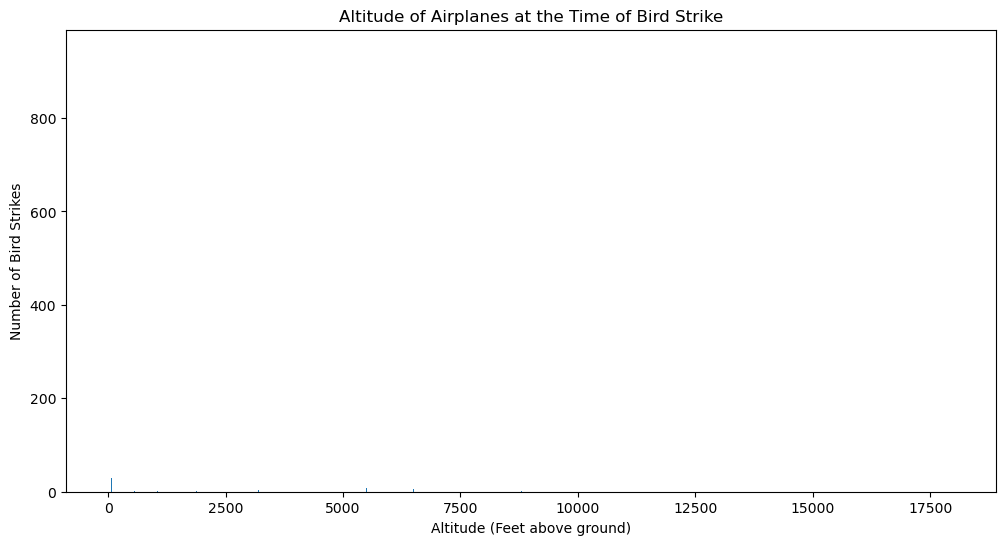

In [105]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
plt.title('Altitude of Airplanes at the Time of Bird Strike')
plt.xlabel('Altitude (Feet above ground)')
plt.ylabel('Number of Bird Strikes')
plt.show()

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_12424\2612031277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')


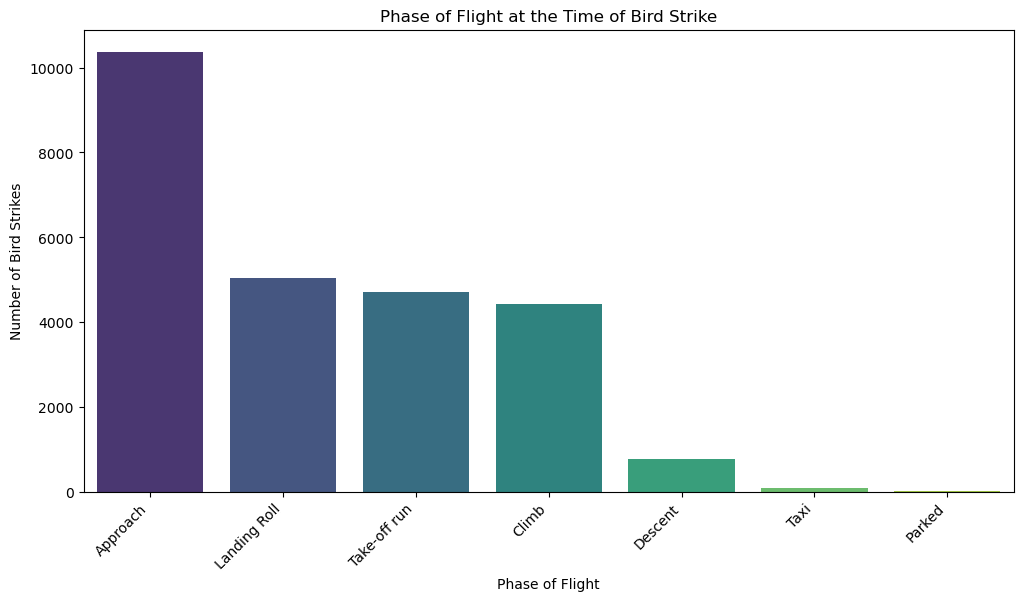

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Phase of Flight at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

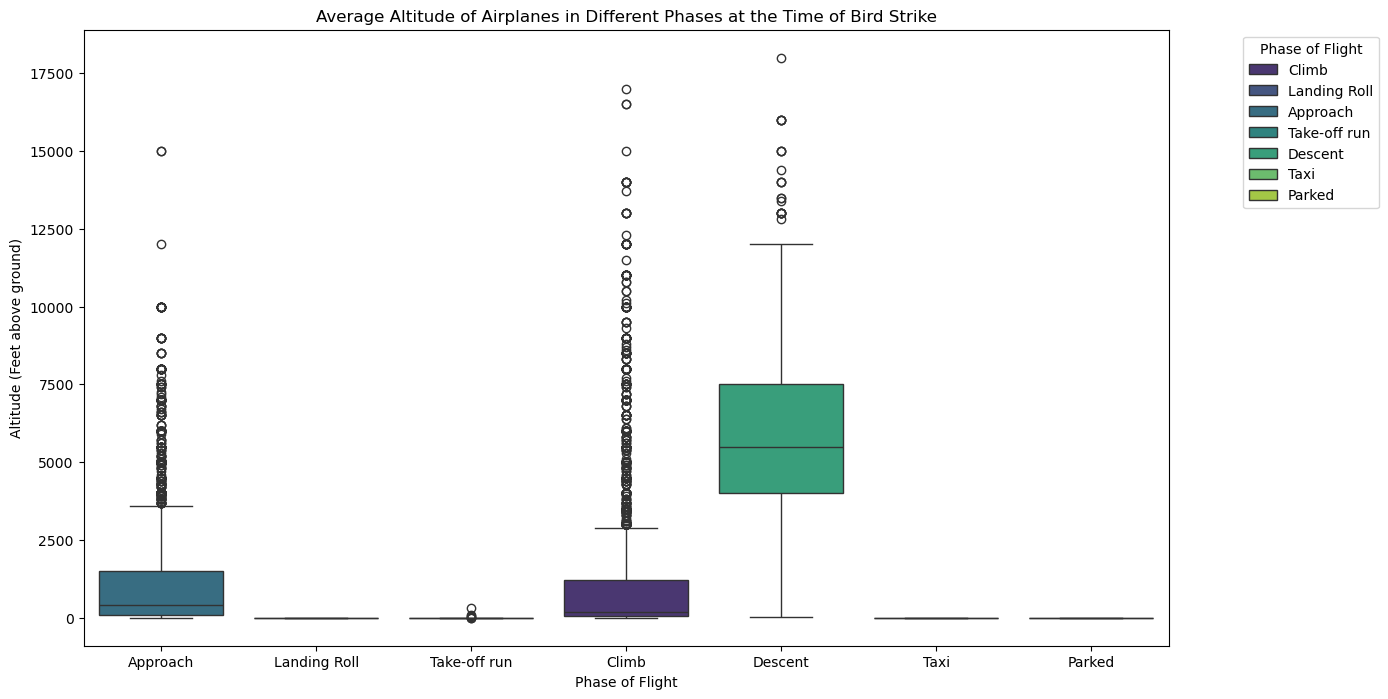

In [109]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df, 
            order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Altitude (Feet above ground)')
plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_12424\2318845711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2')


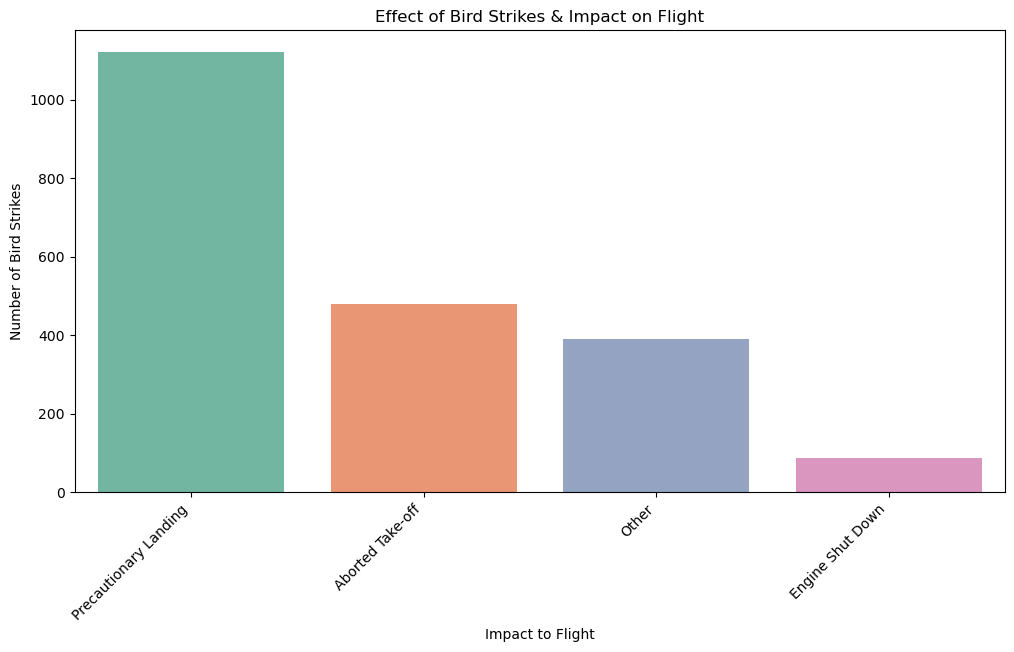

In [114]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2')
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_12424\3163318266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')


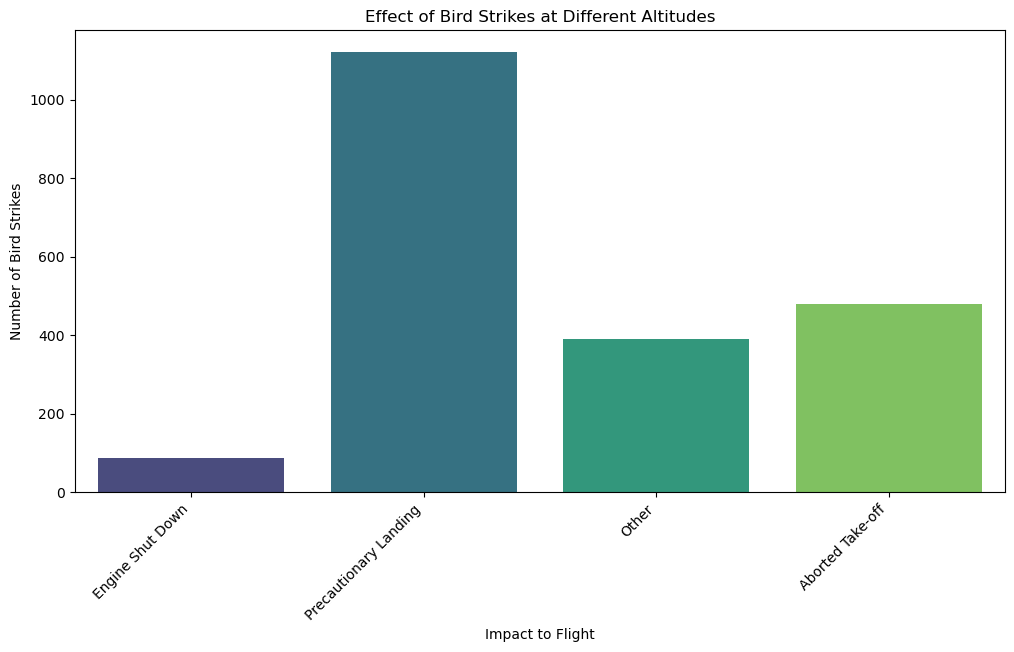

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

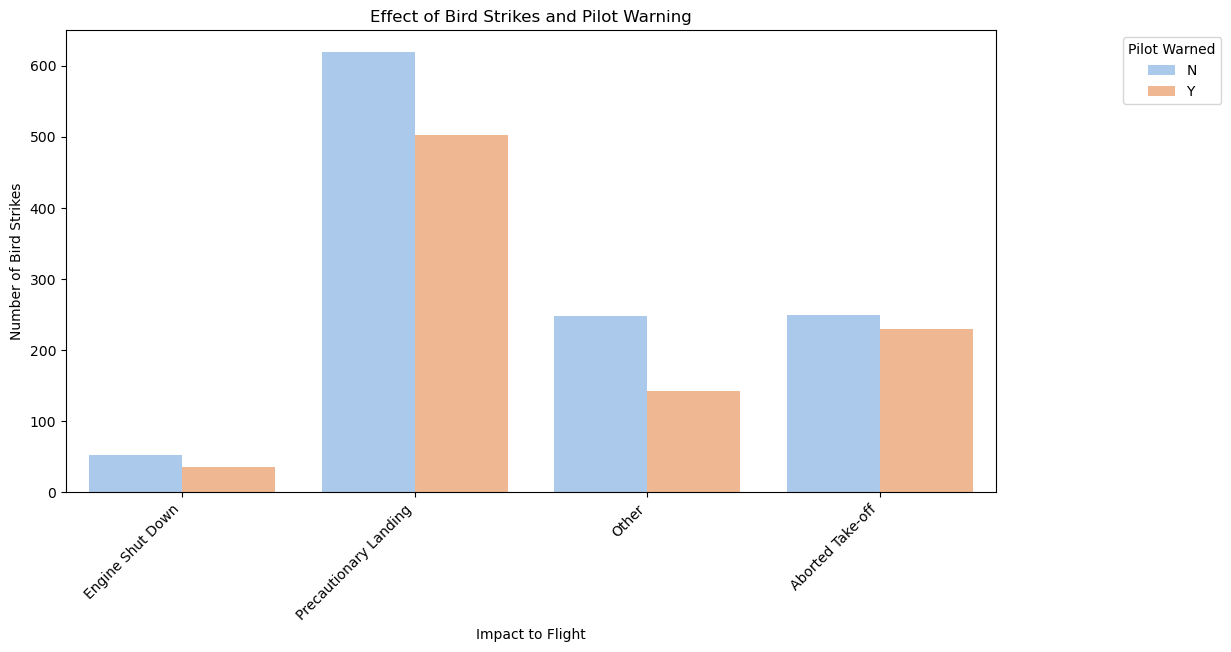

In [118]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
plt.title('Effect of Bird Strikes and Pilot Warning')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()